library

In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import csv

file path

In [49]:
origin_data_path = 'G:\\NYU_Class\\InforVis\\project\\data\\'
ouput_data_path = 'G:\\NYU_Class\\InforVis\\project\\VisNews4Stock\\data_out\\'

### generate change categories by normal distribution 

In [6]:
dj_data = pd.read_csv(origin_data_path + 'DJIA_table.csv')

In [7]:
dj_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [11]:
dj_data['change'] = dj_data['Open'] - dj_data['Adj Close']

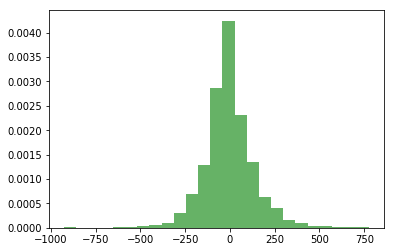

In [13]:
# Plot the histogram.
plt.hist(dj_data['change'], bins=25, density=True, alpha=0.6, color='g')
plt.show()

In [20]:
dj_change_z = stats.zscore(dj_data['change'])
print(len(dj_change_z))
print(len([x for x in dj_change_z if x > 1]))
print(len([x for x in dj_change_z if x < -1]))
dj_data['change Z'] = dj_change_z

1989
235
238


In [21]:
dj_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,change,change Z
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,-0.150240
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,-217.230468,-1.510805
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,-238.660157,-1.662582
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,-219.210937,-1.524832
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,214.970704,1.550274


### Text clean

In [24]:
stop_words_set = set(stopwords.words('english')) 

In [27]:
def text_processing(text, stop_words):
    text = text.lower()
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    filter_words = [word for word in words if word not in stop_words]
    return filter_words

### word frequency generate

In [29]:
news_data = pd.read_csv(origin_data_path + 'RedditNews.csv')

In [30]:
news_data.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [31]:
combined_data = dj_data.merge(news_data, left_on='Date', right_on='Date', how='inner')

In [32]:
combined_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,change,change Z,News
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,-0.15024,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,-0.15024,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,-0.15024,"The president of France says if Brexit won, so..."
3,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,-0.15024,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,-0.15024,100+ Nobel laureates urge Greenpeace to stop o...


In [38]:
increase_part_data = combined_data[combined_data['change Z'] > 1]
decrease_part_data = combined_data[combined_data['change Z'] < -1]
increase_news_list = increase_part_data['News']
decrease_news_list = decrease_part_data['News']

In [40]:
# text to words
increase_news_list = [text_processing(text, stop_words_set) for text in increase_news_list ]
decrease_news_list = [text_processing(text, stop_words_set) for text in decrease_news_list]

In [42]:
def word_count(text_list):
    word_dict = {}
    for words in text_list:
        for word in words:
            if word in word_dict:
                word_dict[word] = word_dict[word] + 1
            else:
                word_dict[word] = 1
    return word_dict

In [46]:
increase_news_dict = word_count(increase_news_list)
decrease_news_dict = word_count(decrease_news_list)

In [51]:
with open(ouput_data_path + 'increase_news_word_count.csv', 'w', newline='') as f:
    w = csv.DictWriter(f, increase_news_dict.keys())
    w.writeheader()
    w.writerow(increase_news_dict)
with open(ouput_data_path + 'decrease_news_word_count.csv', 'w', newline='') as f:
    w = csv.DictWriter(f, decrease_news_dict.keys())
    w.writeheader()
    w.writerow(decrease_news_dict)